In [3]:
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#just in case!
from scipy.stats import sem

In [20]:
#read in data
clinical_trial_df = pd.read_csv('clinicaltrial_data.csv')
mouse_drug_df = pd.read_csv('mouse_drug_data.csv')


#clinical_trial_df.head()
#mouse_drug_df.head()

In [17]:
#find duplicate mice
drop_dup_mouse_id = clinical_trial_df.loc[clinical_trial_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_clinical_trial_df = clinical_trial_df[clinical_trial_df['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_mouse_df = mouse_drug_df[mouse_drug_df['Mouse ID'].isin(drop_dup_mouse_id)==False]

#combine the dataframes using Mouse ID
combined_data = pd.merge(clean_clinical_trial_df, clean_mouse_df, on = "Mouse ID")
#combined_data.head()
#sort by Timepoint 
sort_by_time = combined_data.sort_values("Timepoint", ascending= True) 

#to reset index
all_sort_by_time = sort_by_time.reset_index()
del all_sort_by_time['index']
all_sort_by_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,v409,0,45.0,0,Placebo
2,u946,0,45.0,0,Propriva
3,w140,0,45.0,0,Zoniferol
4,a577,0,45.0,0,Infubinol


In [21]:
#Tumor Response to Treatment

In [32]:
#delete Metastatic Sites column
tumor_volume = all_sort_by_time.drop('Metastatic Sites', axis=1)

#make 'Drug' index
drug_groups = tumor_volume.pivot_table(tumor_volume, index=['Drug','Timepoint'], aggfunc='mean')

#find standard error of mean
sem_tumor_volume = tumor_volume.pivot_table(tumor_volume, index=['Drug','Timepoint'], aggfunc='sem')

#Make a new df for tumor volume changes
change_tumor_volume = drug_groups
change_tumor_volume['Change in Tumor Vol. (mm3)'] = change_tumor_volume.groupby('Drug')['Tumor Volume (mm3)'].diff()

#remove tumor volume column
new_change_tumor_vol = change_tumor_volume.drop('Tumor Volume (mm3)', axis= 1)

#correct NaNs
new_change_tumor_vol.fillna(0, inplace=True)
new_change_tumor_vol.head(100)

Change in Tumor Vol. (mm3)
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                           -0.733914
          10                          -1.181796
          15                          -1.019973
          20                          -1.347992
          25                          -0.776797
          30                          -1.170189
          35                          -0.952500
          40                          -0.858838
          45                          -0.721887
Ceftamin  0                            0.000000
          5                            1.503051
          10                           1.782074
          15                           1.808930
          20                           2.062994
          25                           2.130626
          30                           2.481843
          35                           2.058031
          40                           2.640348
          45                           2.664526
Infubinol 0                            0.000000
          5                            2.062001
          10                           2.341908
          15                           1.892488
          20                           1.901294
          25                           2.517561
          30                           2.584145
          35                           2.443064
          40                           2.420363
          45                           2.592738
...                                         ...
Ramicane  0                            0.000000
          5                           -1.055141
          10                          -1.412902
          15                          -1.036896
          20                          -1.256736
          25                          -1.264025
          30                          -0.271162
          35                          -1.251141
          40                          -0.877916
          45                          -1.618486
Stelasyn  0                            0.000000
          5                            2.470830
          10                           1.864537
          15                           2.112657
          20                           2.522055
          25                           2.202741
          30                           3.697707
          35                           2.561492
          40                           2.924365
          45                           3.081924
Zoniferol 0                            0.000000
          5                            1.851818
          10                           1.838063
          15                           2.089178
          20                           2.391275
          25                           2.262601
          30                           2.280596
          35                           2.375841
          40                           2.827320
          45                           3.044196

[100 rows x 1 columns]

In [40]:
#pivot
sem_table = sem_tumor_volume.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
tumor_vol_table = drug_groups.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
tumor_vol_table.head()                                          

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


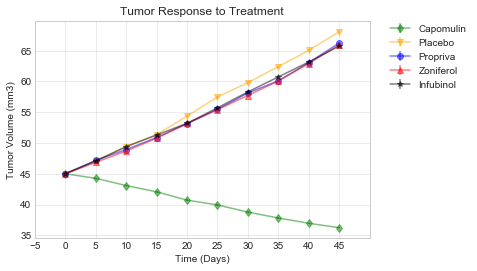

In [53]:
# Set the x_axis, colors, markers, and xlim for graph
x_axis= np.arange(0,50,5)
drugs = tumor_volume["Drug"].unique()
count = np.arange(0,len('drugs'))
plt.xlim(0,50)

colors = ['green','orange','blue','red','black','yellow','pink','magenta','brown','purple' ]
markers = ['d','v','o','^','*','2','3','4','8','.']

from scipy import stats
plt.style.use('seaborn-whitegrid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha = 0.5)
for i in count:
    standard_errors = stats.sem(sem_table[drugs[i]])
    plt.errorbar(x_axis, tumor_vol_table[drugs[i]], yerr = standard_errors, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()

In [ ]:
#Metastatic Response to Treatment

In [88]:
metastatic_response = all_sort_by_time.drop('Tumor Volume (mm3)', axis = 1)
#metastatic_response.head()
#make drug the index and get sem
metastatic_mean = metastatic_response.pivot_table(metastatic_response, index = ['Drug','Timepoint',], aggfunc='mean')
metastatic_sem = metastatic_response.pivot_table(metastatic_response, index = ['Drug','Timepoint',], aggfunc='sem')

#tables
metastatic_mean_table = metastatic_mean.pivot_table('Metastatic Sites', ['Timepoint'],'Drug')
metastatic_sem_table = metastatic_sem.pivot_table('Metastatic Sites', ['Timepoint'],'Drug')
metastatic_mean_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


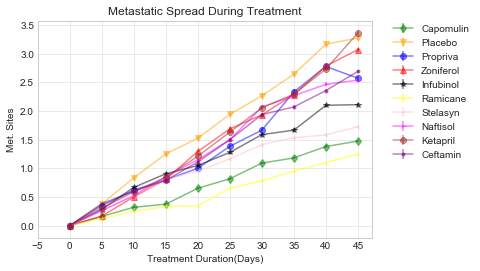

In [85]:
#graph
x_axis = np.arange(0,50,5)
drugs = all_sort_by_time["Drug"].unique()
count = np.arange(0,len(drugs))
colors = ['green','orange','blue','red','black','yellow','pink','magenta','brown','purple' ]
markers = ['d','v','o','^','*','2','3','4','8','.']

plt.style.use('seaborn-whitegrid')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.grid(alpha = 0.5)


for i in count:
    graph_data = stats.sem(metastatic_sem_table[drugs[i]])
    plt.errorbar(x_axis, metastatic_mean_table[drugs[i]], yerr = graph_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()

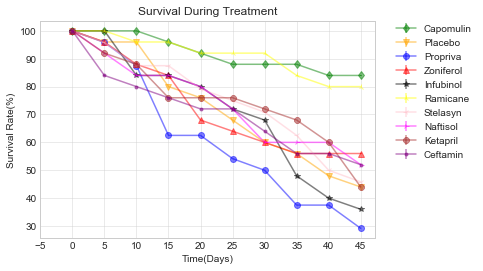

In [101]:
#Survival Rate
mouse_survive = metastatic_response.drop('Metastatic Sites', axis = 1)

#make Drug the index and show means
mouse_survival = mouse_survive.pivot_table(mouse_survive, index=['Drug','Timepoint'], aggfunc='count')
#rename Mouse ID --> Mouse Count
mouse_survival_rename = mouse_survival.rename(columns={"Mouse ID":"Mouse Count"})

#make Timepoint index
mouse_survival_tbl = mouse_survival_rename.pivot_table('Mouse Count',['Timepoint'],'Drug')

#rate
percent_surviving = (1-(mouse_survival_tbl.iloc[0]- mouse_survival_tbl)/mouse_survival_tbl.iloc[0])*100
percent_surviving

#graph
x_axis = np.arange(0,50,5)
drugs = all_sort_by_time["Drug"].unique()
count = np.arange(0,len(drugs))
colors = ['green','orange','blue','red','black','yellow','pink','magenta','brown','purple' ]
markers = ['d','v','o','^','*','2','3','4','8','.']

plt.style.use('seaborn-whitegrid')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(alpha = 0.5)

#points
for i in count:
    plt.errorbar(x_axis, percent_surviving[drugs[i]], yerr = graph_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()

In [102]:
#Summary Bar Graph

In [117]:
#first and last row of tumor vol. table
summ_tumor_vol = tumor_vol_table.iloc[[0,-1]]
#tumor volume change
percent_change_tumor_vol= (((summ_tumor_vol -tumor_vol_table.iloc[0])/tumor_vol_table.iloc[0]))*100

#last row
percent_changes = percent_change_tumor_vol.iloc[1:]
percent_changes.sum()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

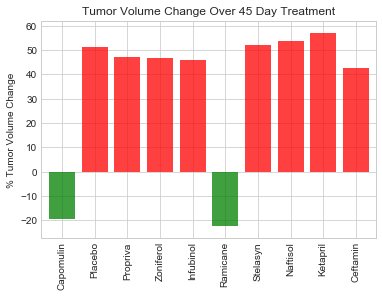

In [132]:
#bar graph indicating tumor growth as red and tumor reduction as green
plt.style.use('seaborn-whitegrid')
performance = {}
for x in count:
    performance[drugs[x]] = float(percent_changes[drugs[x]])
x_axis = np.arange(0, len(drugs))
tick_locations = []

for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xlim(-0.25, len(drugs))
plt.ylim(min(performance.values()) - 5, max(performance.values()) + 5)
plt.title("Tumor Volume Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors > 0
bar_colors = bar_colors.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, performance, rotation="vertical")
plt.bar(x_axis, performance.values(), color=bar_colors, alpha=0.75, align="edge")


plt.show()

In [ ]:
#fin